In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import Image
import ukb_functions as ukb

In [29]:
# change delimiters to ',' and add a header
pcfile = 'propca40_projections.txt'
o = open('tmp.txt','w')
for i in np.arange(1,41):
    o.write('pc' + str(i))
    if i <= 39:
        o.write(',')
o.write('\n')
with open(pcfile,'r') as f:
    for line in f:
        stuff = line.rstrip().split()
        o.write(','.join(stuff) + '\n')
o.close()

In [30]:
propcs = pd.read_csv('tmp.txt')
propcs.head(2)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40
0,0.00151,0.000719,0.001334,0.000642,-0.000685,-0.001972,-0.001804,0.002523,-0.000622,-0.000887,...,-0.001547,-0.000213,-0.001722,-0.002425,0.002651,0.002362,-0.000856,-0.000036,-0.000861,-0.000384
1,0.00211,0.000741,0.001118,0.000048,-0.000600,0.000156,0.000501,0.000735,-0.000080,-0.000583,...,-0.001984,-0.002231,-0.002163,0.000140,-0.000194,0.001014,-0.002850,-0.002216,-0.000265,0.000443


In [31]:
# insert the eids as the first column
eids = [int(x.split()[0]) for x in open('chrMerged_ukb_pca.fam','r').readlines()]
print(eids[:5])
propcs.insert(0,'eid',eids)
propcs.head(5)

[1000027, 1000040, 1000053, 1000088, 1000109]


,eid,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,...,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40
0,1000027,0.001510,0.000719,0.001334,0.000642,-0.000685,-0.001972,-0.001804,0.002523,-0.000622,...,-0.001547,-0.000213,-0.001722,-0.002425,0.002651,0.002362,-0.000856,-0.000036,-0.000861,-0.000384
1,1000040,0.002110,0.000741,0.001118,0.000048,-0.000600,0.000156,0.000501,0.000735,-0.000080,...,-0.001984,-0.002231,-0.002163,0.000140,-0.000194,0.001014,-0.002850,-0.002216,-0.000265,0.000443
2,1000053,0.000313,-0.001631,-0.002091,-0.000050,0.001080,-0.000260,-0.000340,0.000471,0.001867,...,-0.000431,-0.000095,-0.000697,0.001809,-0.001395,0.002744,-0.000492,-0.003760,0.001581,0.001979
3,1000088,0.000304,0.001095,-0.000609,-0.001663,-0.003357,0.001163,-0.001384,-0.002814,0.001094,...,-0.000167,0.001895,-0.001837,-0.002187,0.001379,-0.000165,-0.000431,-0.000453,0.000026,-0.000843
4,1000109,-0.000475,-0.004668,-0.001201,-0.003948,-0.000504,-0.001123,-0.001459,-0.000780,0.002210,...,0.002468,-0.001483,0.000884,0.002503,-0.001147,0.001714,0.001331,0.000675,0.000269,0.001938


# look at 30 smartPCA PCs

In [34]:
# change delimiters to ',' and add a header
pcfile = 'chrMerged_ukb_smartpca_30.evec'
o = open('tmp.txt','w')
o.write('eid,')
for i in np.arange(1,31):
    o.write('pc' + str(i))
    if i <= 29:
        o.write(',')
o.write('\n')
with open(pcfile,'r') as f:
    header = f.readline()
    for line in f:
        stuff = line.rstrip().split()
        stuff[0] = stuff[0].split(':')[0]
        stuff = stuff[:-1]
        o.write(','.join(stuff) + '\n')
o.close()

In [35]:
smartpcs = pd.read_csv('tmp.txt')
smartpcs.head(5)

,eid,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,...,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30
0,1000027,-0.0015,0.0007,0.0013,0.0006,0.0007,-0.0020,-0.0018,-0.0025,-0.0007,...,0.0008,-0.0018,0.0004,-0.0006,0.0005,-0.0032,0.0005,0.0004,0.0019,0.0015
1,1000040,-0.0021,0.0007,0.0011,0.0001,0.0006,0.0003,0.0005,-0.0007,-0.0001,...,0.0020,0.0002,0.0007,-0.0020,-0.0007,-0.0015,-0.0010,-0.0008,0.0020,0.0027
2,1000053,-0.0003,-0.0016,-0.0021,-0.0000,-0.0011,-0.0002,-0.0004,-0.0005,0.0018,...,-0.0025,-0.0019,-0.0018,-0.0015,-0.0019,0.0011,0.0015,0.0016,0.0033,-0.0003
3,1000088,-0.0003,0.0011,-0.0006,-0.0017,0.0034,0.0012,-0.0013,0.0028,0.0011,...,-0.0002,-0.0014,0.0000,-0.0010,-0.0001,0.0021,0.0037,0.0023,0.0013,0.0009
4,1000109,0.0005,-0.0047,-0.0012,-0.0039,0.0006,-0.0011,-0.0014,0.0008,0.0023,...,-0.0014,0.0019,-0.0009,0.0015,-0.0002,0.0009,-0.0007,-0.0041,-0.0009,-0.0021


In [36]:
eids = smartpcs.eid.tolist()
eid_data = pd.read_csv('../00_csv_files/eid_data.csv')
POB_NUTS3 = dict(zip(eid_data.eid,eid_data.POB_NUTSID))
POB_NUTS1 = [POB_NUTS3[x][:3] for x in eids]
smartpcs.insert(1,'POB_NUTS1',POB_NUTS1)
smartpcs.head(5)

,eid,POB_NUTS1,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30
0,1000027,UKE,-0.0015,0.0007,0.0013,0.0006,0.0007,-0.0020,-0.0018,-0.0025,...,0.0008,-0.0018,0.0004,-0.0006,0.0005,-0.0032,0.0005,0.0004,0.0019,0.0015
1,1000040,UKK,-0.0021,0.0007,0.0011,0.0001,0.0006,0.0003,0.0005,-0.0007,...,0.0020,0.0002,0.0007,-0.0020,-0.0007,-0.0015,-0.0010,-0.0008,0.0020,0.0027
2,1000053,UKK,-0.0003,-0.0016,-0.0021,-0.0000,-0.0011,-0.0002,-0.0004,-0.0005,...,-0.0025,-0.0019,-0.0018,-0.0015,-0.0019,0.0011,0.0015,0.0016,0.0033,-0.0003
3,1000088,UKC,-0.0003,0.0011,-0.0006,-0.0017,0.0034,0.0012,-0.0013,0.0028,...,-0.0002,-0.0014,0.0000,-0.0010,-0.0001,0.0021,0.0037,0.0023,0.0013,0.0009
4,1000109,UKF,0.0005,-0.0047,-0.0012,-0.0039,0.0006,-0.0011,-0.0014,0.0008,...,-0.0014,0.0019,-0.0009,0.0015,-0.0002,0.0009,-0.0007,-0.0041,-0.0009,-0.0021


In [37]:
# scatter and do NUTS1 colors
nuts1, nuts1_color_list, nuts1_color_dict = ukb.get_nuts1_colors()
print(nuts1)

['UKC', 'UKD', 'UKE', 'UKF', 'UKG', 'UKH', 'UKI', 'UKJ', 'UKK', 'UKL', 'UKM', 'UKN']


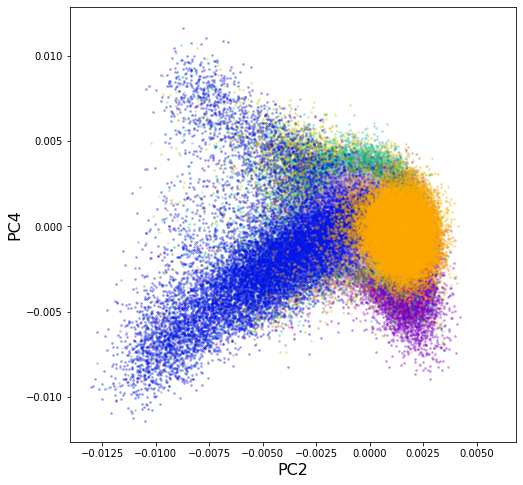

In [38]:
f,a = plt.subplots(1,1,figsize = (8,8))
for i,region in enumerate(nuts1):
    pcX = propcs[smartpcs.POB_NUTS1==region].pc2
    pcY = propcs[smartpcs.POB_NUTS1==region].pc4
    a.scatter(pcX,pcY,c=[nuts1_color_list[i]],s=3,alpha=0.3)
plt.xlabel('PC2',fontsize=16)
plt.ylabel('PC4',fontsize=16)
plt.show()

# make covar files

In [39]:
# add chip and sex and batch and DOB
# scp igw9@cbsulogin.tc.cornell.edu:/bscb/bscb09/500k_ukb/ian/gwas_files/covar_sex_pcs_batch_chip.txt .
# cut -d ' ' -f 1,3,4,45,46 covar_sex_pcs_batch_chip.txt > dob_sex_batch_chip.txt
# add header: emacs dob_sex_batch_chip.txt
dob_sex_batch_chip = pd.read_csv('dob_sex_batch_chip.txt',delimiter = ' ')
dob_sex_batch_chip.head(5)

,eid,dob,sex,batch,chip
0,4194304,1946,0,86,1
1,1048584,1951,1,7,1
2,5242889,1968,1,2,1
3,5242890,1947,0,61,1
4,3145739,1943,1,67,1


In [40]:
dob_dict = dict(zip(dob_sex_batch_chip.eid,dob_sex_batch_chip.dob))
sex_dict = dict(zip(dob_sex_batch_chip.eid,dob_sex_batch_chip.sex))
batch_dict = dict(zip(dob_sex_batch_chip.eid,dob_sex_batch_chip.batch))
chip_dict = dict(zip(dob_sex_batch_chip.eid,dob_sex_batch_chip.chip))

In [9]:
pc_eids = propcs.eid.tolist()
print(pc_eids[:5])

[1000027, 1000040, 1000053, 1000088, 1000109]


In [10]:
dobs = [dob_dict[x] for x in pc_eids]
sexs = [sex_dict[x] for x in pc_eids]
batchs = [batch_dict[x] for x in pc_eids]
chips = [chip_dict[x] for x in pc_eids]

In [11]:
propcs['dob'] = dobs
propcs['sex'] = sexs
propcs['batch'] = batchs
propcs['chip'] = chips
propcs.head(5)

,eid,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,...,pc35,pc36,pc37,pc38,pc39,pc40,dob,sex,batch,chip
0,1000027,0.001510,0.000719,0.001334,0.000642,-0.000685,-0.001972,-0.001804,0.002523,-0.000622,...,0.002651,0.002362,-0.000856,-0.000036,-0.000861,-0.000384,1955,1,8,1
1,1000040,0.002110,0.000741,0.001118,0.000048,-0.000600,0.000156,0.000501,0.000735,-0.000080,...,-0.000194,0.001014,-0.002850,-0.002216,-0.000265,0.000443,1940,0,66,1
2,1000053,0.000313,-0.001631,-0.002091,-0.000050,0.001080,-0.000260,-0.000340,0.000471,0.001867,...,-0.001395,0.002744,-0.000492,-0.003760,0.001581,0.001979,1940,1,4,1
3,1000088,0.000304,0.001095,-0.000609,-0.001663,-0.003357,0.001163,-0.001384,-0.002814,0.001094,...,0.001379,-0.000165,-0.000431,-0.000453,0.000026,-0.000843,1941,1,14,1
4,1000109,-0.000475,-0.004668,-0.001201,-0.003948,-0.000504,-0.001123,-0.001459,-0.000780,0.002210,...,-0.001147,0.001714,0.001331,0.000675,0.000269,0.001938,1947,1,-5,2


In [12]:
propcs.insert(1,'eid1',pc_eids)
propcs.head(5)

,eid,eid1,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,pc35,pc36,pc37,pc38,pc39,pc40,dob,sex,batch,chip
0,1000027,1000027,0.001510,0.000719,0.001334,0.000642,-0.000685,-0.001972,-0.001804,0.002523,...,0.002651,0.002362,-0.000856,-0.000036,-0.000861,-0.000384,1955,1,8,1
1,1000040,1000040,0.002110,0.000741,0.001118,0.000048,-0.000600,0.000156,0.000501,0.000735,...,-0.000194,0.001014,-0.002850,-0.002216,-0.000265,0.000443,1940,0,66,1
2,1000053,1000053,0.000313,-0.001631,-0.002091,-0.000050,0.001080,-0.000260,-0.000340,0.000471,...,-0.001395,0.002744,-0.000492,-0.003760,0.001581,0.001979,1940,1,4,1
3,1000088,1000088,0.000304,0.001095,-0.000609,-0.001663,-0.003357,0.001163,-0.001384,-0.002814,...,0.001379,-0.000165,-0.000431,-0.000453,0.000026,-0.000843,1941,1,14,1
4,1000109,1000109,-0.000475,-0.004668,-0.001201,-0.003948,-0.000504,-0.001123,-0.001459,-0.000780,...,-0.001147,0.001714,0.001331,0.000675,0.000269,0.001938,1947,1,-5,2


In [14]:
cols_to_keep = ['eid', 'eid1', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8',
       'pc9', 'pc10', 'dob', 'sex', 'batch', 'chip']
propcs10 = propcs[cols_to_keep]
propcs10.head(3)

,eid,eid1,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,dob,sex,batch,chip
0,1000027,1000027,0.001510,0.000719,0.001334,0.000642,-0.000685,-0.001972,-0.001804,0.002523,-0.000622,-0.000887,1955,1,8,1
1,1000040,1000040,0.002110,0.000741,0.001118,0.000048,-0.000600,0.000156,0.000501,0.000735,-0.000080,-0.000583,1940,0,66,1
2,1000053,1000053,0.000313,-0.001631,-0.002091,-0.000050,0.001080,-0.000260,-0.000340,0.000471,0.001867,0.001507,1940,1,4,1


In [15]:
propcs10.to_csv('covar_propcs10_dob_sex_batch_chip.txt', sep = ' ', header = False, index = False)
# scp covar_propcs10_dob_sex_batch_chip.txt igw9@cbsulogin.tc.cornell.edu:/bscb/bscb09/500k_ukb/ian/gwas_files/.

In [21]:
propcs.to_csv('covar_propcs_dob_sex_batch_chip.txt', sep = ' ', header = False, index = False)
# scp covar_propcs_dob_sex_batch_chip.txt igw9@cbsulogin.tc.cornell.edu:/bscb/bscb09/500k_ukb/ian/gwas_files/.

In [41]:
smartpcs_eids = smartpcs.eid.tolist()
print(smartpcs_eids[:5])

[1000027, 1000040, 1000053, 1000088, 1000109]


In [42]:
dobs = [dob_dict[x] for x in smartpcs_eids]
sexs = [sex_dict[x] for x in smartpcs_eids]
batchs = [batch_dict[x] for x in smartpcs_eids]
chips = [chip_dict[x] for x in smartpcs_eids]
smartpcs['dob'] = dobs
smartpcs['sex'] = sexs
smartpcs['batch'] = batchs
smartpcs['chip'] = chips
smartpcs.head(5)

,eid,POB_NUTS1,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,pc25,pc26,pc27,pc28,pc29,pc30,dob,sex,batch,chip
0,1000027,UKE,-0.0015,0.0007,0.0013,0.0006,0.0007,-0.0020,-0.0018,-0.0025,...,0.0005,-0.0032,0.0005,0.0004,0.0019,0.0015,1955,1,8,1
1,1000040,UKK,-0.0021,0.0007,0.0011,0.0001,0.0006,0.0003,0.0005,-0.0007,...,-0.0007,-0.0015,-0.0010,-0.0008,0.0020,0.0027,1940,0,66,1
2,1000053,UKK,-0.0003,-0.0016,-0.0021,-0.0000,-0.0011,-0.0002,-0.0004,-0.0005,...,-0.0019,0.0011,0.0015,0.0016,0.0033,-0.0003,1940,1,4,1
3,1000088,UKC,-0.0003,0.0011,-0.0006,-0.0017,0.0034,0.0012,-0.0013,0.0028,...,-0.0001,0.0021,0.0037,0.0023,0.0013,0.0009,1941,1,14,1
4,1000109,UKF,0.0005,-0.0047,-0.0012,-0.0039,0.0006,-0.0011,-0.0014,0.0008,...,-0.0002,0.0009,-0.0007,-0.0041,-0.0009,-0.0021,1947,1,-5,2


In [43]:
smartpcs.drop(columns='POB_NUTS1',inplace=True)

In [44]:
smartpcs.insert(1,'eid1',smartpcs_eids)
smartpcs.head(5)

,eid,eid1,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,...,pc25,pc26,pc27,pc28,pc29,pc30,dob,sex,batch,chip
0,1000027,1000027,-0.0015,0.0007,0.0013,0.0006,0.0007,-0.0020,-0.0018,-0.0025,...,0.0005,-0.0032,0.0005,0.0004,0.0019,0.0015,1955,1,8,1
1,1000040,1000040,-0.0021,0.0007,0.0011,0.0001,0.0006,0.0003,0.0005,-0.0007,...,-0.0007,-0.0015,-0.0010,-0.0008,0.0020,0.0027,1940,0,66,1
2,1000053,1000053,-0.0003,-0.0016,-0.0021,-0.0000,-0.0011,-0.0002,-0.0004,-0.0005,...,-0.0019,0.0011,0.0015,0.0016,0.0033,-0.0003,1940,1,4,1
3,1000088,1000088,-0.0003,0.0011,-0.0006,-0.0017,0.0034,0.0012,-0.0013,0.0028,...,-0.0001,0.0021,0.0037,0.0023,0.0013,0.0009,1941,1,14,1
4,1000109,1000109,0.0005,-0.0047,-0.0012,-0.0039,0.0006,-0.0011,-0.0014,0.0008,...,-0.0002,0.0009,-0.0007,-0.0041,-0.0009,-0.0021,1947,1,-5,2


In [45]:
smartpcs.to_csv('covar_smartpcs30_dob_sex_batch_chip.txt', sep = ' ', header = False, index = False)
# scp covar_smartpcs30_dob_sex_batch_chip.txt igw9@cbsulogin.tc.cornell.edu:/bscb/bscb09/500k_ukb/ian/gwas_files/.

In [23]:
smartpcs10 = smartpcs[cols_to_keep]
smartpcs10.head(3)

,eid,eid1,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,dob,sex,batch,chip
0,1000027,1000027,-0.0015,0.0007,-0.0013,-0.0006,-0.0007,-0.0020,-0.0018,0.0025,0.0006,0.0008,1955,1,8,1
1,1000040,1000040,-0.0021,0.0007,-0.0011,-0.0001,-0.0006,0.0003,0.0005,0.0008,0.0002,0.0008,1940,0,66,1
2,1000053,1000053,-0.0003,-0.0016,0.0021,0.0000,0.0011,-0.0002,-0.0004,0.0005,-0.0018,-0.0017,1940,1,4,1


In [24]:
smartpcs10.to_csv('covar_smartpcs10_dob_sex_batch_chip.txt', sep = ' ', header = False, index = False)
# scp covar_smartpcs10_dob_sex_batch_chip.txt igw9@cbsulogin.tc.cornell.edu:/bscb/bscb09/500k_ukb/ian/gwas_files/.

# initial exploration: 5 PCs, proPCA and smartPCA

In [2]:
# change delimiters to ',' and add a header
pcfile = 'propca_projections_5.txt'
o = open('tmp.txt','w')
o.write('pc1,pc2,pc3,pc4,pc5\n')
with open(pcfile,'r') as f:
    for line in f:
        stuff = line.rstrip().split()
        o.write(','.join(stuff) + '\n')
o.close()    

In [3]:
propcs = pd.read_csv('tmp.txt')
propcs.head(2)

,pc1,pc2,pc3,pc4,pc5
0,-0.00151,0.000719,0.001334,-0.000641,-0.000684
1,-0.00211,0.000741,0.001118,-0.000048,-0.000600


In [4]:
# insert the eids as the first column
eids = [int(x.split()[0]) for x in open('chrMerged_ukb_pca.fam','r').readlines()]
print(eids[:5])
propcs['eid'] = eids
propcs.head(5)

[1000027, 1000040, 1000053, 1000088, 1000109]


,pc1,pc2,pc3,pc4,pc5,eid
0,-0.001510,0.000719,0.001334,-0.000641,-0.000684,1000027
1,-0.002110,0.000741,0.001118,-0.000048,-0.000600,1000040
2,-0.000313,-0.001631,-0.002091,0.000051,0.001080,1000053
3,-0.000304,0.001095,-0.000609,0.001662,-0.003356,1000088
4,0.000475,-0.004668,-0.001201,0.003948,-0.000503,1000109


In [15]:
eid_data = pd.read_csv('../00_csv_files/eid_data.csv')
print(len(eid_data))
POB_NUTS3 = dict(zip(eid_data.eid,eid_data.POB_NUTSID))
POB_NUTS1 = [POB_NUTS3[x][:3] for x in eids]
for i,eid in enumerate(eids[:5]):
    print(POB_NUTS3[eid],POB_NUTS1[i])
eid_data.sort_values(by='eid').head(5)

441936
UKE45 UKE
UKK12 UKK
UKK11 UKK
UKC21 UKC
UKF16 UKF


,eid,center,DOB,POB_north,POB_east,POB_NUTSID,POB_gridID,POR_east,POR_north,POR_NUTSID,POR_gridID
8132,1000015,11004,1951,665500,259500,UKM34,3106,257000.0,664000.0,UKM34,3106
275189,1000027,11010,1955,422500,438500,UKE45,5326,430000.0,419000.0,UKE45,5326
121870,1000040,11007,1940,176500,369500,UKK12,4497,454000.0,162000.0,UKJ33,5596
114234,1000053,11011,1940,175500,360500,UKK11,4497,374000.0,166000.0,UKK12,4620
326785,1000064,11016,1947,398500,451500,UKE31,5573,330000.0,377000.0,UKD63,4111


In [9]:
propcs['POB_NUTS1'] = POB_NUTS1
propcs.head(5)

,pc1,pc2,pc3,pc4,pc5,eid,POB_NUTS1
0,-0.001510,0.000719,0.001334,-0.000641,-0.000684,1000027,UKE
1,-0.002110,0.000741,0.001118,-0.000048,-0.000600,1000040,UKK
2,-0.000313,-0.001631,-0.002091,0.000051,0.001080,1000053,UKK
3,-0.000304,0.001095,-0.000609,0.001662,-0.003356,1000088,UKC
4,0.000475,-0.004668,-0.001201,0.003948,-0.000503,1000109,UKF


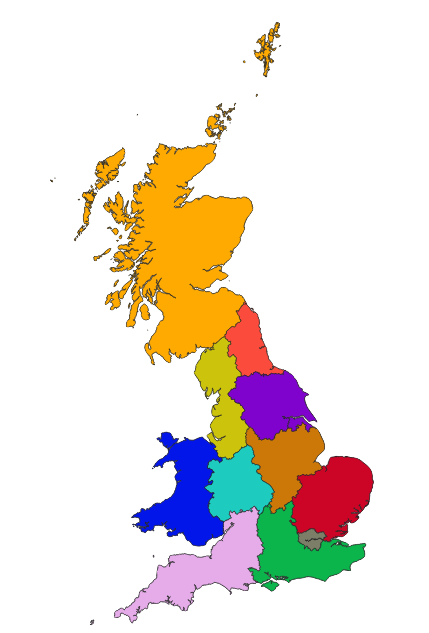

In [15]:
Image(filename='../01_images_figures/UK_nuts1_colors.png')

In [60]:
# scatter and do NUTS1 colors
nuts1, nuts1_color_list, nuts1_color_dict = ukb.get_nuts1_colors()
print(nuts1)

['UKC', 'UKD', 'UKE', 'UKF', 'UKG', 'UKH', 'UKI', 'UKJ', 'UKK', 'UKL', 'UKM', 'UKN']


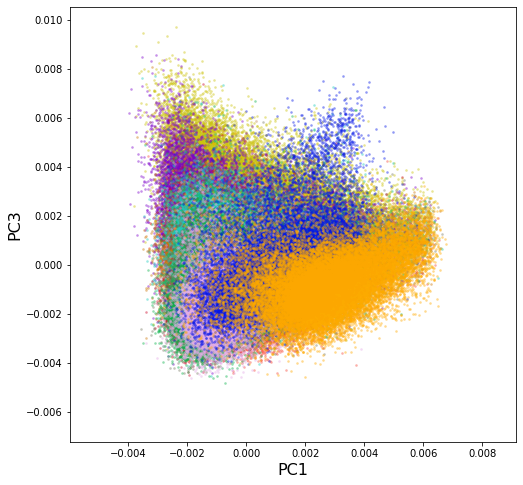

In [22]:
f,a = plt.subplots(1,1,figsize = (8,8))
for i,region in enumerate(nuts1):
    pcX = propcs[propcs.POB_NUTS1==region].pc1
    pcY = propcs[propcs.POB_NUTS1==region].pc3
    a.scatter(pcX,pcY,c=[nuts1_color_list[i]],s=3,alpha=0.3)
plt.xlabel('PC1',fontsize=16)
plt.ylabel('PC3',fontsize=16)
plt.show()

# smartpca: first 5 PCs

In [23]:
# change delimiters to ',' and add a header
pcfile = 'chrMerged_ukb_smartpca_5.evec'
o = open('tmp.txt','w')
o.write('eid,pc1,pc2,pc3,pc4,pc5\n')
with open(pcfile,'r') as f:
    header = f.readline()
    for line in f:
        stuff = line.rstrip().split()
        stuff[0] = stuff[0].split(':')[0]
        stuff = stuff[:-1]
        o.write(','.join(stuff) + '\n')
o.close()

In [24]:
smartpcs = pd.read_csv('tmp.txt')
smartpcs.head(5)

,eid,pc1,pc2,pc3,pc4,pc5
0,1000027,-0.0015,0.0007,-0.0013,-0.0006,-0.0002
1,1000040,-0.0021,0.0007,-0.0011,0.0006,-0.0002
2,1000053,-0.0003,-0.0016,0.0021,-0.0005,0.0003
3,1000088,-0.0003,0.0011,0.0006,0.0027,-0.0030
4,1000109,0.0005,-0.0047,0.0012,0.0031,0.0004


In [49]:
smartpc_dict = dict(zip(smartpcs.eid,smartpcs.pc5))
propc_dict = dict(zip(propcs.eid,propcs.pc5))

In [50]:
intersection = list(set(smartpc_dict.keys())&set(propc_dict.keys()))

In [51]:
spc = [smartpc_dict[x] for x in intersection]
ppc = [propc_dict[x] for x in intersection]

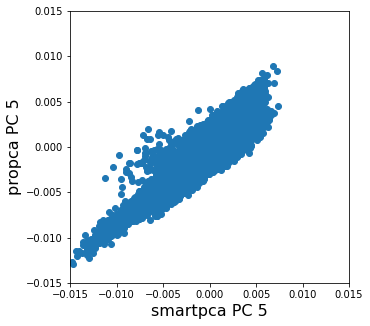

In [54]:
f,a = plt.subplots(1,1,figsize = (5,5))
plt.scatter(spc,ppc)
plt.xlabel('smartpca PC 5',fontsize=16)
plt.ylabel('propca PC 5',fontsize=16)
lim = [-0.015, 0.015]
plt.xlim(lim)
plt.ylim(lim)
plt.show()

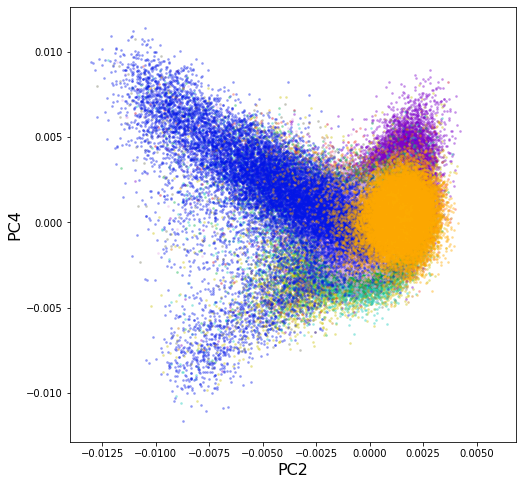

In [62]:
f,a = plt.subplots(1,1,figsize = (8,8))
for i,region in enumerate(nuts1):
    pcX = propcs[propcs.POB_NUTS1==region].pc2
    pcY = propcs[propcs.POB_NUTS1==region].pc4
    a.scatter(pcX,pcY,c=[nuts1_color_list[i]],s=3,alpha=0.3)
plt.xlabel('PC2',fontsize=16)
plt.ylabel('PC4',fontsize=16)
plt.show()

20985
['UKL11', 'UKL12', 'UKL13', 'UKL14', 'UKL15', 'UKL16', 'UKL17', 'UKL18', 'UKL21', 'UKL22', 'UKL23', 'UKL24']


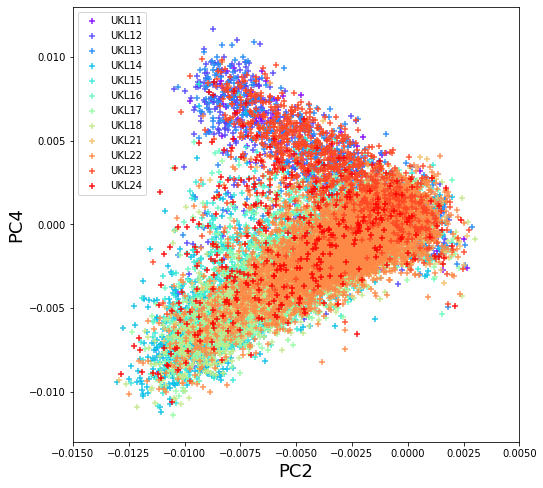

In [91]:
# let's look at Wales (UKL), PC2 vs PC4, based on NUTS3 regions
wales_eids = []
for eid in POB_NUTS3.keys():
    if POB_NUTS3[eid][:3] == 'UKL':
        wales_eids.append(eid)
print(len(wales_eids))

wales_nuts3 = sorted(list(set([POB_NUTS3[eid] for eid in wales_eids])))
print(wales_nuts3)

cols = ukb.get_ncolors_from_cmap(len(wales_nuts3),colormap = 'rainbow')
pc2 = dict(zip(propcs.eid,propcs.pc2))
pc4 = dict(zip(propcs.eid,propcs.pc4))
f,a = plt.subplots(1,1,figsize=(8,8))
for i,nuts3 in enumerate(wales_nuts3):
    eids_in_region = [x for x in wales_eids if POB_NUTS3[x] == nuts3]
    pcX = [pc2[x] for x in eids_in_region if x in pc2.keys()]
    pcY = [-pc4[x] for x in eids_in_region if x in pc4.keys()]
    plt.scatter(pcX,pcY,c=[cols[i]],alpha = 0.9,label=nuts3,marker ='+')
plt.xlim([-0.015,0.005])
plt.ylim([-0.013,0.013])
plt.xlabel('PC2',fontsize=18)
plt.ylabel('PC4',fontsize=18)
plt.legend()
plt.show()

In [92]:
# stayer vs mover on PCs
wba = [int(x.split()[0]) for x in open('../00_csv_files/mus_wba_eids.csv','r').readlines()]
print(wba[:5])

[4194304, 1048584, 5242889, 5242890, 3145739]


In [93]:
pob_por = pd.read_csv('../00_csv_files/pob_por_ac_distances.csv')
pob_por.head(3)

,eid,center,distances,POB_east,POB_north,POR_east,POR_north,POB_distance,POR_distance,closest_center_POR,POR_distance_closest,POB_distance_closest,closest_center_POB
0,1136349,11004,229901.065678,68500,801500,252000.0,663000.0,234227.018930,7490.487100,11004.0,7490.487100,234227.018930,11004
1,1071275,11004,196729.509734,66500,798500,211000.0,665000.0,234138.707601,48107.415198,11004.0,48107.415198,234138.707601,11004
2,4778319,11005,287336.910264,66500,798500,323000.0,669000.0,287623.081466,5681.636384,11005.0,5681.636384,234138.707601,11004


In [94]:
stayers = pob_por[pob_por.distances < 20000].eid.tolist()
movers =  pob_por[pob_por.distances >= 20000].eid.tolist()
wba_movers = list(set(wba) & set(movers))
wba_stayers = list(set(wba) & set(stayers))

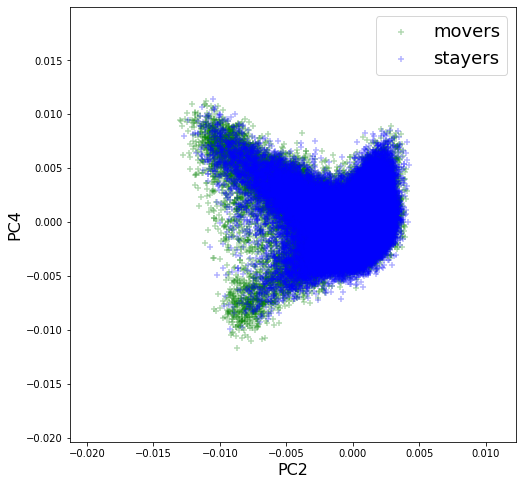

In [113]:
f,a = plt.subplots(1,1,figsize = (8,8))
pcXmovers = propcs[propcs.eid.isin(wba_movers)].pc2
pcYmovers = propcs[propcs.eid.isin(wba_movers)].pc4
pcXstayers = propcs[propcs.eid.isin(wba_stayers)].pc2
pcYstayers = propcs[propcs.eid.isin(wba_stayers)].pc4

plt.scatter(pcXmovers,pcYmovers,marker = '+',c = 'g',label = 'movers',alpha = 0.3)
plt.scatter(pcXstayers,pcYstayers,marker = '+',c = 'b',label='stayers',alpha = 0.3)

plt.xlabel('PC2',fontsize=16)
plt.ylabel('PC4',fontsize=16)
plt.legend(fontsize=18)
plt.show()

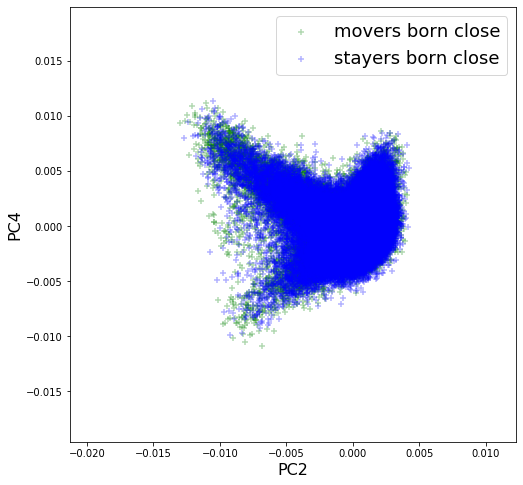

In [112]:
born_close = pob_por[pob_por.POB_distance_closest < 25000].eid.tolist()
wba_stayers_bornclose = list(set(wba_stayers)&set(born_close))
wba_movers_bornclose = list(set(wba_movers)&set(born_close))

f,a = plt.subplots(1,1,figsize = (8,8))
pcXmovers = propcs[propcs.eid.isin(wba_movers_bornclose)].pc2
pcYmovers = propcs[propcs.eid.isin(wba_movers_bornclose)].pc4
pcXstayers = propcs[propcs.eid.isin(wba_stayers_bornclose)].pc2
pcYstayers = propcs[propcs.eid.isin(wba_stayers_bornclose)].pc4

plt.scatter(pcXmovers,pcYmovers,marker = '+',c = 'g',label = 'movers born close',alpha = 0.3)
plt.scatter(pcXstayers,pcYstayers,marker = '+',c = 'b',label='stayers born close',alpha = 0.3)

plt.xlabel('PC2',fontsize=16)
plt.ylabel('PC4',fontsize=16)
plt.legend(fontsize=18)
plt.show()

# rural 500

In [4]:
# change delimiters to ',' and add a header
pcfile = 'pca_rural500.evec'
o = open('tmp.txt','w')
o.write('eid,')
for i in np.arange(1,11):
    o.write('pc' + str(i))
    if i <= 9:
        o.write(',')
o.write('\n')
with open(pcfile,'r') as f:
    header = f.readline()
    for line in f:
        stuff = line.rstrip().split()
        stuff[0] = stuff[0].split(':')[0]
        stuff = stuff[:-1]
        o.write(','.join(stuff) + '\n')
o.close()

In [5]:
ruralpcs = pd.read_csv('tmp.txt')
ruralpcs.head(5)

,eid,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,1005000,-0.0139,0.0036,0.0090,-0.0000,-0.0084,-0.0096,-0.0135,0.0067,0.0084,-0.0032
1,1005248,0.0003,0.0010,0.0049,-0.0109,-0.0001,-0.0029,0.0006,0.0042,0.0038,-0.0106
2,1010938,0.0033,-0.0051,-0.0111,0.0056,-0.0096,-0.0215,-0.0004,0.0142,-0.0110,0.0158
3,1018899,-0.0116,-0.0184,-0.0007,-0.0055,0.0018,-0.0108,0.0160,0.0144,-0.0102,-0.6422
4,1034247,-0.0051,0.0043,-0.0055,-0.0019,-0.0003,-0.0194,-0.0034,0.0034,-0.0028,0.0050


In [9]:
eids = ruralpcs.eid.tolist()
eid_data = pd.read_csv('../00_csv_files/eid_data.csv')
POB_NUTS3 = dict(zip(eid_data.eid,eid_data.POB_NUTSID))
POB_NUTS1 = [POB_NUTS3[x][:3] for x in eids]
ruralpcs.insert(1,'POB_NUTS1',POB_NUTS1)
ruralpcs.head(5)

In [15]:
# scatter and do NUTS1 colors
nuts1, nuts1_color_list, nuts1_color_dict = ukb.get_nuts1_colors()
print(nuts1)

['UKC', 'UKD', 'UKE', 'UKF', 'UKG', 'UKH', 'UKI', 'UKJ', 'UKK', 'UKL', 'UKM', 'UKN']


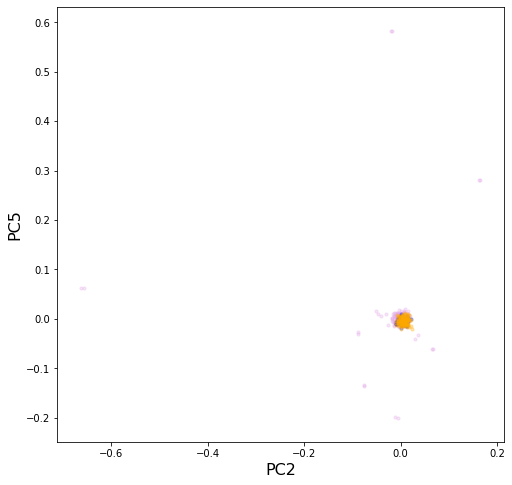

In [14]:
f,a = plt.subplots(1,1,figsize = (8,8))
for i,region in enumerate(nuts1):
    pcX = ruralpcs[ruralpcs.POB_NUTS1==region].pc2
    pcY = ruralpcs[ruralpcs.POB_NUTS1==region].pc5
    a.scatter(pcX,pcY,c=[nuts1_color_list[i]],s=10,alpha=0.3)
plt.xlabel('PC2',fontsize=16)
plt.ylabel('PC5',fontsize=16)
plt.show()

In [10]:
# not much going on there. Let's look at the map.
eid_data.head(2)

,eid,center,DOB,POB_north,POB_east,POB_NUTSID,POB_gridID,POR_east,POR_north,POR_NUTSID,POR_gridID
0,1136349,11004,1947,801500,68500,UKM64,774,252000.0,663000.0,UKM34,3106
1,1071275,11004,1952,798500,66500,UKM64,775,211000.0,665000.0,UKM63,2618


In [11]:
POBE = dict(zip(eid_data.eid,eid_data.POB_east))
POBN = dict(zip(eid_data.eid,eid_data.POB_north))
easts = [POBE[x] for x in ruralpcs.eid]
norths = [POBN[x] for x in ruralpcs.eid]

In [17]:
ruralpcs['POB_north'] = norths
ruralpcs['POB_east'] = easts
ruralpcs.head(3)

,eid,POB_NUTS1,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,POB_north,POB_east
0,1005000,UKK,-0.0139,0.0036,0.0090,-0.0000,-0.0084,-0.0096,-0.0135,0.0067,0.0084,-0.0032,149500,367500
1,1005248,UKK,0.0003,0.0010,0.0049,-0.0109,-0.0001,-0.0029,0.0006,0.0042,0.0038,-0.0106,153500,345500
2,1010938,UKK,0.0033,-0.0051,-0.0111,0.0056,-0.0096,-0.0215,-0.0004,0.0142,-0.0110,0.0158,79500,367500


In [18]:
ruralpcs.to_csv('../00_csv_files/rural500_pcs.csv',index=False)

In [2]:
# PCs calculated on all_wba
# change delimiters to ',' and add a header
pcfile = 'pca_all_wba.evec'
o = open('tmp.txt','w')
o.write('eid,')
for i in np.arange(1,11):
    o.write('pc' + str(i))
    if i <= 9:
        o.write(',')
o.write('\n')
with open(pcfile,'r') as f:
    header = f.readline()
    for line in f:
        stuff = line.rstrip().split()
        stuff[0] = stuff[0].split(':')[0]
        stuff = stuff[:-1]
        o.write(','.join(stuff) + '\n')
o.close()

In [3]:
all_wba_pcs = pd.read_csv('tmp.txt')
all_wba_pcs.head(5)

,eid,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,1000027,-0.0014,0.0007,-0.0012,0.0001,-0.0009,-0.0020,0.0013,0.0018,-0.0011,0.0012
1,1000040,-0.0019,0.0008,-0.0010,-0.0002,-0.0004,0.0004,-0.0002,0.0010,-0.0005,0.0017
2,1000053,-0.0003,-0.0015,0.0018,0.0010,0.0008,-0.0003,0.0006,0.0003,0.0016,-0.0013
3,1000064,-0.0018,0.0010,-0.0010,0.0003,0.0010,0.0019,0.0013,-0.0002,0.0008,0.0036
4,1000088,-0.0003,0.0010,0.0006,-0.0031,-0.0010,0.0010,0.0006,-0.0026,0.0018,0.0015


In [7]:
all_wba_pcs_rural = all_wba_pcs[all_wba_pcs.eid.isin(eids)]
all_wba_pcs_rural.head(5)

,eid,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
399,1005000,-0.0013,-0.0009,0.0021,0.0011,0.0010,0.0003,0.0009,0.0014,0.0000,0.0011
418,1005248,-0.0007,0.0001,0.0019,0.0004,-0.0009,0.0024,-0.0002,-0.0002,-0.0015,0.0010
877,1010938,-0.0018,-0.0008,0.0015,0.0011,-0.0000,0.0010,0.0011,0.0007,0.0020,0.0018
1535,1018899,-0.0011,-0.0004,0.0021,0.0000,0.0011,-0.0001,0.0003,0.0003,0.0032,-0.0038
2761,1034247,-0.0017,-0.0013,0.0025,0.0037,0.0009,0.0003,-0.0001,-0.0007,-0.0007,-0.0023


In [12]:
POBE = dict(zip(eid_data.eid,eid_data.POB_east))
POBN = dict(zip(eid_data.eid,eid_data.POB_north))
easts = [POBE[x] for x in all_wba_pcs_rural.eid]
norths = [POBN[x] for x in all_wba_pcs_rural.eid]

In [13]:
all_wba_pcs_rural['POB_north'] = norths
all_wba_pcs_rural['POB_east'] = easts
all_wba_pcs_rural.head(3)

/Users/iwoods/p3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/iwoods/p3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,eid,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,POB_north,POB_east
399,1005000,-0.0013,-0.0009,0.0021,0.0011,0.0010,0.0003,0.0009,0.0014,0.0000,0.0011,149500,367500
418,1005248,-0.0007,0.0001,0.0019,0.0004,-0.0009,0.0024,-0.0002,-0.0002,-0.0015,0.0010,153500,345500
877,1010938,-0.0018,-0.0008,0.0015,0.0011,-0.0000,0.0010,0.0011,0.0007,0.0020,0.0018,79500,367500


In [14]:
all_wba_pcs_rural.to_csv('../00_csv_files/rural500_all_wba_pcs.csv',index=False)

In [16]:
eids = all_wba_pcs_rural.eid.tolist()
POB_NUTS3 = dict(zip(eid_data.eid,eid_data.POB_NUTSID))
POB_NUTS1 = [POB_NUTS3[x][:3] for x in eids]
all_wba_pcs_rural.insert(1,'POB_NUTS1',POB_NUTS1)
all_wba_pcs_rural.head(5)

,eid,POB_NUTS1,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,POB_north,POB_east
399,1005000,UKK,-0.0013,-0.0009,0.0021,0.0011,0.0010,0.0003,0.0009,0.0014,0.0000,0.0011,149500,367500
418,1005248,UKK,-0.0007,0.0001,0.0019,0.0004,-0.0009,0.0024,-0.0002,-0.0002,-0.0015,0.0010,153500,345500
877,1010938,UKK,-0.0018,-0.0008,0.0015,0.0011,-0.0000,0.0010,0.0011,0.0007,0.0020,0.0018,79500,367500
1535,1018899,UKK,-0.0011,-0.0004,0.0021,0.0000,0.0011,-0.0001,0.0003,0.0003,0.0032,-0.0038,151500,364500
2761,1034247,UKK,-0.0017,-0.0013,0.0025,0.0037,0.0009,0.0003,-0.0001,-0.0007,-0.0007,-0.0023,153500,345500


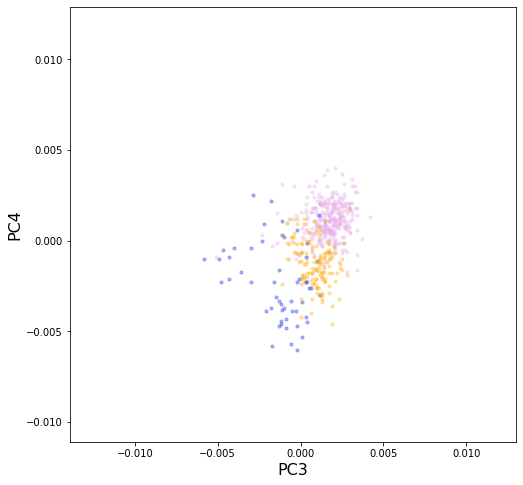

In [28]:
f,a = plt.subplots(1,1,figsize = (8,8))
for i,region in enumerate(nuts1):
    pcX = all_wba_pcs_rural[all_wba_pcs_rural.POB_NUTS1==region].pc3
    pcY = all_wba_pcs_rural[all_wba_pcs_rural.POB_NUTS1==region].pc4
    a.scatter(pcX,pcY,c=[nuts1_color_list[i]],s=10,alpha=0.3)
plt.xlabel('PC3',fontsize=16)
plt.ylabel('PC4',fontsize=16)
plt.show()